In [3]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
import os
def channel2Energie(c):
    return c * 0.0013902686264571718;
def gauss_function(x, a, x0, sigma):
    return a * np.exp(-(x - x0)**2 / (2 * sigma**2))

In [4]:
folder_path = "data/210417_Halbleiter/kapazität"
csv_files = [f for f in os.listdir(folder_path) if f.endswith('.TKA')]

data = {}

for csv_file in csv_files:
    file_path = os.path.join(folder_path, csv_file)
    file_data = np.loadtxt(file_path, delimiter=',', skiprows=2)
    data[int(csv_file.replace('.TKA', ''))] = file_data

0pF: mu=5.501mEV, sigma= 4.72kEV 

4,72 & 5,501 

20pF: mu=5.5mEV, sigma= 5.17kEV 

5,17 & 5,5 

95pF: mu=5.498mEV, sigma= 8.13kEV 

8,13 & 5,498 

245pF: mu=5.496mEV, sigma= 9.17kEV 

9,17 & 5,496 

320pF: mu=5.495mEV, sigma= 11.4kEV 

11,4 & 5,495 

770pF: mu=5.487mEV, sigma= 16.2kEV 

16,2 & 5,487 

1020pF: mu=5.485mEV, sigma= 18.0kEV 

18,0 & 5,485 

1770pF: mu=5.481mEV, sigma= 22.6kEV 

22,6 & 5,481 



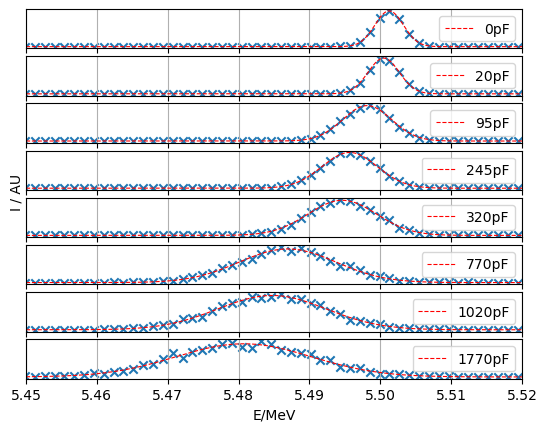

In [15]:


fig, ax = plt.subplots(len(data), 1, sharex=True)

fwhms = np.zeros(len(csv_files))
caps =  np.zeros(len(csv_files))

for i, d in enumerate(sorted(data.keys())):
    channels = np.arange(2, len(data[d]) + 2)
    energies = channel2Energie(channels)
    ax[i].scatter(energies, data[d], marker='x')
    ax[i].set_yticks([])
    ax[i].grid()

    p0 = [data[d].max(), energies[data[d].argmax()], 0.01]
    coeff, _ = curve_fit(gauss_function, energies, data[d], p0=p0)
    fwhms[i] = 2* np.sqrt(2*np.log(2)) * coeff[2] * 1e3
    caps[i] = d
    fine_energies = np.linspace(min(energies), max(energies), 100000)
    ax[i].plot(fine_energies, gauss_function(fine_energies, *coeff),'r--', linewidth=0.8, label=f"{d}pF")
    ax[i].legend()

    print(f"{d}pF: mu={coeff[1]:.4}mEV, sigma= {2* np.sqrt(2*np.log(2)) * coeff[2] * 1e3 :.3}kEV \n")
    print((f"{2* np.sqrt(2*np.log(2)) * coeff[2] * 1e3 :.3} & {coeff[1]:.4} \n").replace(".", ","))



ax[-1].set(xlim = [5.45, 5.52], xlabel="E/MeV")
fig.text(0.10, 0.5, 'I / AU', va='center', rotation='vertical')
fig.savefig('out/artificial_capacity_pulse.png')



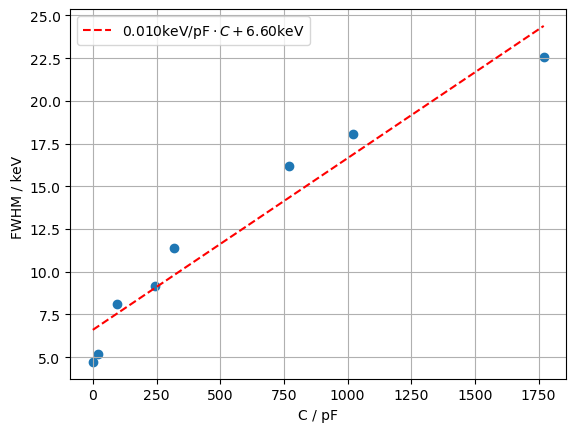

In [42]:
fig2, ax2 = plt.subplots()
ax2.scatter(caps, fwhms)
ax2.grid()
ax2.set(xlabel="C / pF", ylabel="FWHM / keV ")

fit_params = np.polyfit(caps, fwhms, deg=1)
fit_fn = np.poly1d(fit_params)
fit_x = np.linspace(min(caps), max(caps), 100)
ax2.plot(fit_x, fit_fn(fit_x), 'r--', label=r'${:.3f} \mathrm{{keV}} / \mathrm{{pF}} \cdot C + {:.2f} \mathrm{{keV}}$'.format(fit_params[0], fit_params[1]))
ax2.legend()
fig2.savefig('out/lin_reg_cap')

In [37]:
fwhm_test_pulse = [45.5, 43.5, 44.4, 44.4, 42.2, 39.6, 11.4, 10.6]
print(fit_fn(fwhm_test_pulse))

[7.053775   7.03367359 7.04271922 7.04271922 7.02060768 6.99447586
 6.71104607 6.70300551]
